# 1. Business Problem
To conduct a comprehensive analysis of blinkit's sales performance, customer satisfication, and inventory distribution to identify key insights and opportunities for optimization using various KPI's and visualization in power Bi.

# 2. Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.simplefilter("ignore")

In [2]:
blink = pd.read_excel(r"E:\Naresh IT\Project File\Data Analysis Project file\Blinkit\BlinkIT Grocery Data.xlsx")
pd.set_option("display.max_columns",None)

In [3]:
blink

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


# 3. Data and understanding Exploartion

In [4]:
blink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
blink.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [6]:
discrete=['Item Fat Content', 'Item Identifier', 'Item Type','Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type']
continous=['Outlet Establishment Year','Item Visibility',
       'Item Weight', 'Sales','Rating' ]


In [7]:
blink[continous].describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [8]:
blink[discrete].describe()

,Item Fat Content,Item Identifier,Item Type,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type
count,8523,8523,8523,8523,8523,8523,8523
unique,5,1559,16,10,3,3,4
top,Low Fat,FDW13,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1
freq,5089,10,1232,935,3350,3631,5577


- Duplicate value

In [9]:
blink.duplicated().sum()

0

- Null value

In [10]:
blink.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

 - Outliers

<Axes: xlabel='Rating'>

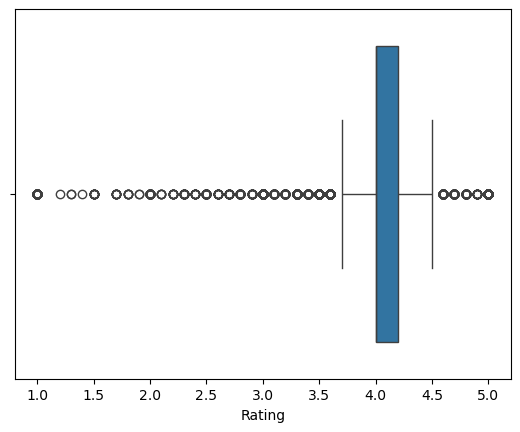

In [11]:
sns.boxplot(x=blink["Rating"])

# 4. Data Preprocessing 

### 4.1 Feature Selection

In [ ]:
blink.drop(['Item Identifier','Outlet Identifier','Item Weight','Item Visibility'],axis = 1, inplace = True)

In [ ]:
blink

#### 4.2 Wrong data 

In [14]:
blink["Item Fat Content"].value_counts()

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [15]:
blink["Item Fat Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"},inplace=True)

In [16]:
blink["Outlet Location Type"].value_counts()

Outlet Location Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [17]:
blink["Outlet Type"].value_counts()

Outlet Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [18]:
blink["Outlet Size"].value_counts()

Outlet Size
Medium    3631
Small     3139
High      1753
Name: count, dtype: int64

### 4.2 Data Cleaning

- There is no need to data cleaning as there is no problem.

# 5. Save the cleaned data

In [ ]:
blink.to_excel("cleaned_blink.xlsx",index=False)

In [ ]:
pwd

In [ ]:
blink